In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

In [2]:
def data_dictionary():
    path_train="/kaggle/input/dateset-23-skin/dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [3]:
data=data_dictionary()

In [4]:
data

,image_path,target
0,/kaggle/input/dateset-23-skin/dataset/Light Di...,0
1,/kaggle/input/dateset-23-skin/dataset/Light Di...,0
2,/kaggle/input/dateset-23-skin/dataset/Light Di...,0
3,/kaggle/input/dateset-23-skin/dataset/Light Di...,0
4,/kaggle/input/dateset-23-skin/dataset/Light Di...,0
...,...,...
23179,/kaggle/input/dateset-23-skin/dataset/Warts Mo...,22
23180,/kaggle/input/dateset-23-skin/dataset/Warts Mo...,22
23181,/kaggle/input/dateset-23-skin/dataset/Warts Mo...,22
23182,/kaggle/input/dateset-23-skin/dataset/Warts Mo...,22


In [5]:
lable=data['target']

In [6]:
import cv2
images=[]
label=[]
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
for i in data['image_path']:
    img = load_img(i, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
import numpy as np
import pandas as pd
dataset=np.array(images)


In [9]:
dataset.shape

(23184, 1, 100, 100, 3)

In [11]:
dataset = np.reshape(dataset, (23184, 100, 100, 3))

In [32]:
lable=np.array(lable)

In [33]:
lable.shape

(23184,)

In [3]:
import gc
# Delete variables from memory

#del images

In [4]:
gc.collect()

949

In [23]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (100,100 ,3))                                                                            

80134624/80134624 [==============================] - 0s 0us/step


In [24]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False
    

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [26]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(23,activation='softmax'),

])

In [27]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [28]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 

In [34]:
import keras
acc=[]
num_classes = 23
lable = keras.utils.to_categorical(lable, num_classes)

In [1]:
lable.shape


NameError: name 'lable' is not defined

In [ ]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(dataset, lable, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    #features_train.shape
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
    history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
    model.evaluate(x_test,y_test)

145/145 [==============================] - 6s 42ms/step
Epoch 1/15
580/580 [==============================] - 7s 5ms/step - loss: 2.3518 - accuracy: 0.4002
Epoch 2/15
580/580 [==============================] - 2s 4ms/step - loss: 0.9849 - accuracy: 0.7049
Epoch 3/15
580/580 [==============================] - 2s 4ms/step - loss: 0.5256 - accuracy: 0.8354
Epoch 4/15
580/580 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8904
Epoch 5/15
580/580 [==============================] - 2s 4ms/step - loss: 0.3759 - accuracy: 0.8881
Epoch 6/15
580/580 [==============================] - 2s 4ms/step - loss: 0.2248 - accuracy: 0.9281
Epoch 7/15
580/580 [==============================] - 2s 4ms/step - loss: 0.2328 - accuracy: 0.9323
Epoch 8/15
580/580 [==============================] - 2s 4ms/step - loss: 0.2655 - accuracy: 0.9281
Epoch 9/15
580/580 [==============================] - 2s 4ms/step - loss: 0.1873 - accuracy: 0.9462
Epoch 10/15
580/580 [=======================

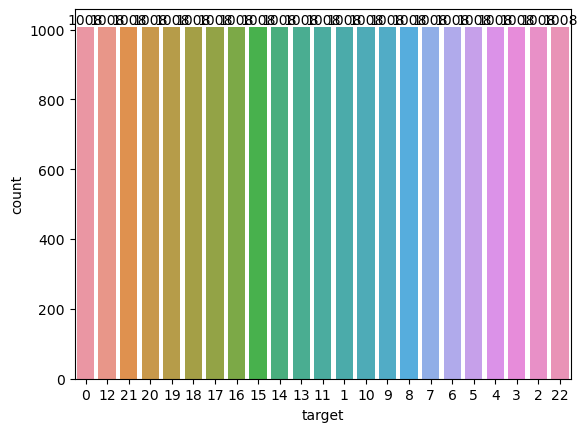

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
ax = sns.countplot(x=data['target'],
                   order=data['target'].value_counts(ascending=False).index);
abs_values = data['target'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

Found 23184 images belonging to 23 classes.


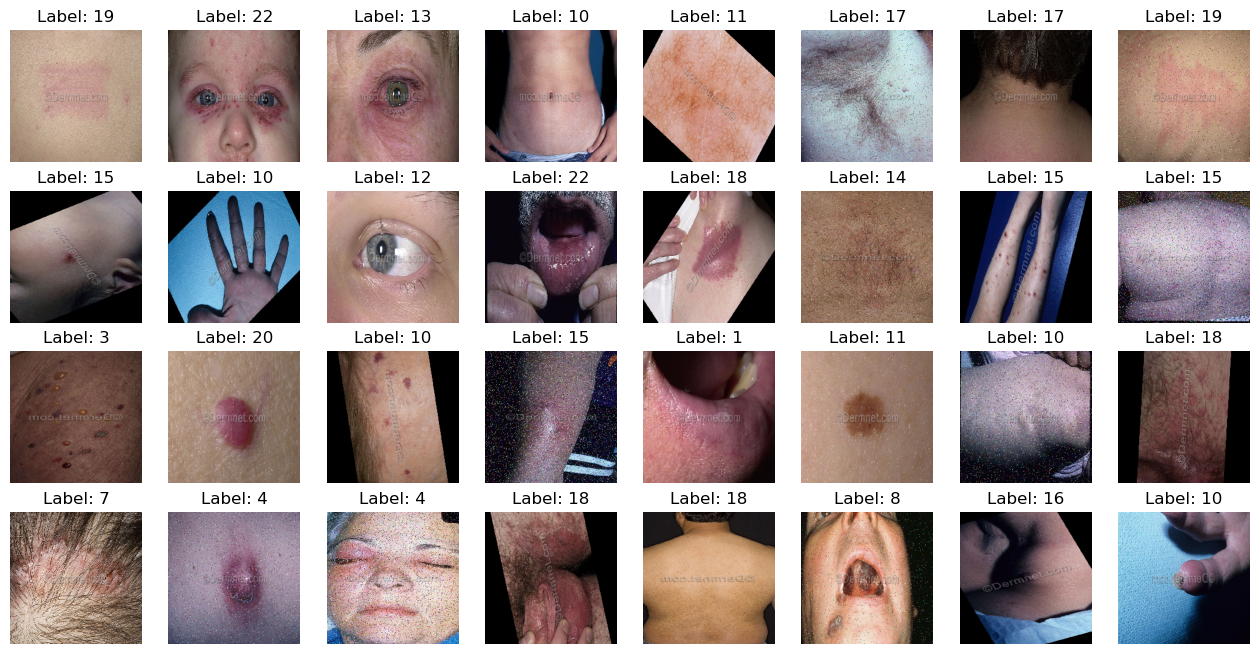

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Generate a batch of images and labels
batch_size = 32
train_generator = datagen.flow_from_directory(
    '/kaggle/input/dateset-23-skin/dataset',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

images, labels = next(train_generator)

# Plot the images
fig, ax = plt.subplots(4, 8, figsize=(16, 8))
for i in range(4):
    for j in range(8):
        ax[i, j].imshow(images[i*8+j])
        ax[i, j].axis('off')
        ax[i, j].set_title('Label: {}'.format(labels[i*8+j].argmax()))
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    #features_train.shape
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
    history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
    model.evaluate(x_test,y_test)

NameError: name 'train_test_split' is not defined